In [65]:
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr
from matplotlib.ticker import FuncFormatter 
from matplotlib.offsetbox import (OffsetImage, AnnotationBbox) 
from matplotlib._png import read_png 
from matplotlib.patches import Ellipse
import matplotlib.mlab as mlab
%matplotlib inline
import plotly.plotly as py
import seaborn as sns
import xml.etree.ElementTree as ET
import geopy.distance
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
import matplotlib as mpl
import datetime
import time
from numpy.random import randn
from sklearn.cross_validation import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from matplotlib import pyplot as plt 
%matplotlib inline 
from sklearn import datasets, linear_model 
import matplotlib.pyplot as plt  # To visualize
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error 
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  

In [66]:
#Loading accident, casualty and vehicle datasets using pandas data frame
acc_data = pd.read_csv("Data/STATS19AccData20052017.csv")
cas_data = pd.read_csv("Data/STATS19CasData20052017.csv")
veh_data = pd.read_csv("Data/STATS19VehData20052017.csv") 
 

In [67]:
#Checking the fields associated with accident table
acc_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71804 entries, 0 to 71803
Data columns (total 27 columns):
Accident Index                   71804 non-null int64
Year                             71804 non-null int64
Severity                         71804 non-null int64
NumberVehicles                   71804 non-null int64
NumberCasualties                 71804 non-null int64
OutputDate                       71804 non-null object
Day                              71804 non-null int64
OutputTime                       71804 non-null object
Easting                          71804 non-null int64
Northing                         71804 non-null int64
LocalAuthority                   71804 non-null int64
Road1Class                       71804 non-null int64
Road1Number                      71804 non-null int64
CarriagewayType                  71804 non-null int64
SpeedLimit                       71804 non-null int64
JunctionDetail                   71804 non-null int64
JunctionControl          

In [68]:
#Checking the data in accident table
acc_data.head()

,Accident Index,Year,Severity,NumberVehicles,NumberCasualties,OutputDate,Day,OutputTime,Easting,Northing,...,Road2Class,Road2Number,PedCrossingHumanControl,PedCrossingPhysicalFacilities,LightingCondition,WeatherCondition,RoadSurface,SpecialConditions,CarriagewayHazard,PlaceReported
0,100177412005,2005,3,1,1,01/01/2005,7,18:05,371231,408511,...,5,6202,0,0,4,5,2,0,0,1
1,100179802005,2005,3,2,3,01/01/2005,7,03:30,371650,410002,...,7,0,0,0,4,1,2,0,0,1
2,100180752005,2005,2,1,1,01/01/2005,7,03:49,371938,405062,...,0,0,0,0,6,1,2,0,0,1
3,102174932005,2005,3,1,1,01/01/2005,7,02:15,381640,394354,...,0,0,0,0,4,1,1,0,0,2
4,102175392005,2005,3,2,3,01/01/2005,7,20:15,386043,391559,...,6,0,0,0,4,6,2,0,0,1


In [69]:
#Checking the fields associated with casualty table
cas_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100093 entries, 0 to 100092
Data columns (total 14 columns):
Accident Index            100093 non-null int64
Year                      100093 non-null int64
VehicleReferenceNumber    100093 non-null int64
CasualtyNumber            100093 non-null int64
CasualtyClass             100093 non-null int64
Sex                       100093 non-null int64
AgeBandOfCasualty         100093 non-null int64
CasualtySeverity          100093 non-null int64
PedLocation               100093 non-null int64
PedMovement               100093 non-null int64
CarPassenger              100093 non-null int64
BusPassenger              100093 non-null int64
PedInjWork                100093 non-null int64
CasTypeCode               100093 non-null int64
dtypes: int64(14)
memory usage: 10.7 MB


In [70]:
#Checking the data in casualty table
cas_data.head()

,Accident Index,Year,VehicleReferenceNumber,CasualtyNumber,CasualtyClass,Sex,AgeBandOfCasualty,CasualtySeverity,PedLocation,PedMovement,CarPassenger,BusPassenger,PedInjWork,CasTypeCode
0,100177412005,2005,1,1,2,2,4,3,0,0,2,0,2,9
1,100177482005,2005,2,1,2,1,7,3,0,0,1,0,2,9
2,100177482005,2005,2,2,2,2,7,3,0,0,1,0,2,9
3,100179802005,2005,2,1,1,1,8,3,0,0,0,0,2,9
4,100179802005,2005,2,2,2,2,4,3,0,0,2,0,2,9


In [71]:
#Checking the fields associated with Vehicle table
veh_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133710 entries, 0 to 133709
Data columns (total 17 columns):
Accident Index            133710 non-null int64
Year                      133710 non-null int64
VehicleReferenceNumber    133710 non-null int64
VehicleType               133710 non-null int64
ArtTowing                 133710 non-null int64
Manoeuvre                 133710 non-null int64
VehicleLocationOffRoad    133710 non-null int64
JunctionLocation          133710 non-null int64
Skidding                  133710 non-null int64
HitObjectOnCWay           133710 non-null int64
VehicleLeaveCWay          133710 non-null int64
HitObjectOffCWay          133710 non-null int64
FirstPointImpact          133710 non-null int64
JourneyPurpose            133710 non-null int64
ForeignReg                133710 non-null int64
SexOfDriver               133710 non-null int64
AgeBandOfDriver           133710 non-null int64
dtypes: int64(17)
memory usage: 17.3 MB


In [72]:
#Checking the data in Vehicle table
veh_data.head()

,Accident Index,Year,VehicleReferenceNumber,VehicleType,ArtTowing,Manoeuvre,VehicleLocationOffRoad,JunctionLocation,Skidding,HitObjectOnCWay,VehicleLeaveCWay,HitObjectOffCWay,FirstPointImpact,JourneyPurpose,ForeignReg,SexOfDriver,AgeBandOfDriver
0,100177412005,2005,1,9,0,18,0,2,0,7,0,0,1,5,9,1,6
1,100177482005,2005,1,9,0,4,0,0,0,0,0,0,2,5,9,1,7
2,100177482005,2005,2,9,0,4,0,0,0,0,0,0,2,5,9,3,0
3,100179802005,2005,1,9,0,18,0,1,1,0,0,0,3,5,9,1,4
4,100179802005,2005,2,9,0,18,3,1,0,0,0,0,4,5,9,1,8


In [73]:
#merging the datasets 
merged=  pd.merge(acc_data, veh_data, left_on=['Accident Index'], right_on=['Accident Index'])

In [74]:
#mergding all the data sets for analysis
#merged = pd.merge(pd.merge(acc_data,veh_data,on='Accident Index'),cas_data,on='Accident Index')

In [75]:
#Retrieving  10 years dataset for analysis  - from 2008 to 2017
merged = merged[(merged['Year_x'] > 2007)]

In [76]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86671 entries, 47053 to 133723
Data columns (total 43 columns):
Accident Index                   86671 non-null int64
Year_x                           86671 non-null int64
Severity                         86671 non-null int64
NumberVehicles                   86671 non-null int64
NumberCasualties                 86671 non-null int64
OutputDate                       86671 non-null object
Day                              86671 non-null int64
OutputTime                       86671 non-null object
Easting                          86671 non-null int64
Northing                         86671 non-null int64
LocalAuthority                   86671 non-null int64
Road1Class                       86671 non-null int64
Road1Number                      86671 non-null int64
CarriagewayType                  86671 non-null int64
SpeedLimit                       86671 non-null int64
JunctionDetail                   86671 non-null int64
JunctionControl     

In [77]:
#converting the outputdate into Date data type
merged.index = pd.DatetimeIndex(merged['OutputDate'])
#acc_data.index = pd.DatetimeIndex(acc_data['OutputDate'])

Text(0.5,1,'Accidents per month Distribution')

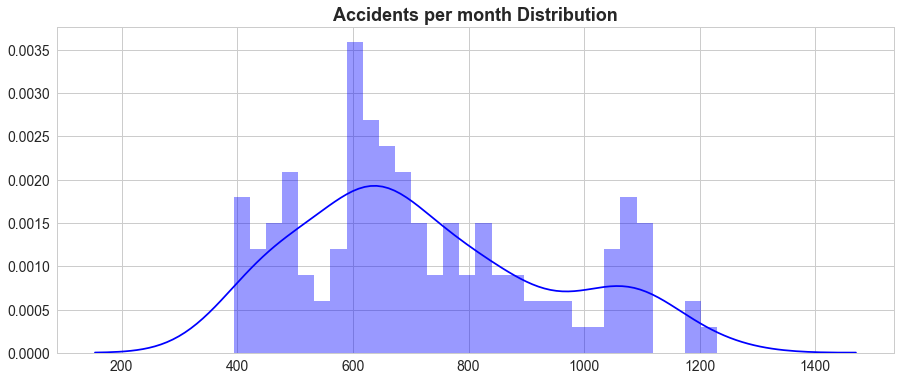

In [78]:
#resampling the data into months and plotting a accidents per month distribution
plt.figure(figsize=(15,6))
plt.tick_params(labelsize=14)
sns.distplot(merged.resample('M').size(), bins=30, color = 'b');
plt.title('Accidents per month Distribution', fontsize=18, fontweight='bold')

Text(0.5,1,'Accidents per day Distribution')

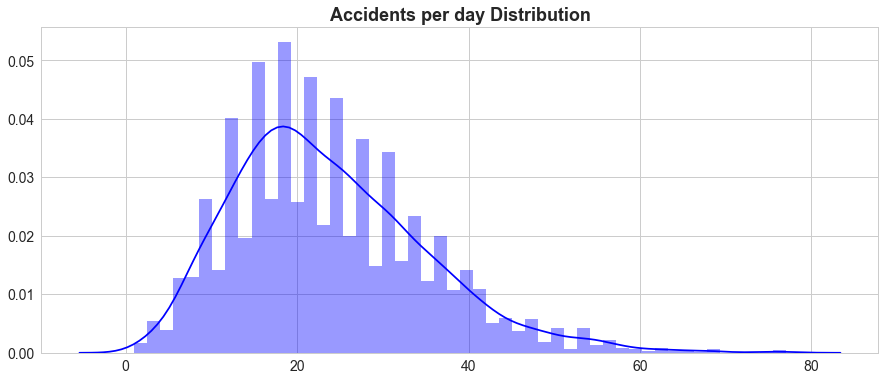

In [80]:
#resampling the data into days and plotting a accidents per day distribution
#The data seems to be normally distributed with slight right(positive) skewness 
plt.figure(figsize=(15,6))
plt.tick_params(labelsize=14)
sns.distplot(merged.resample('D').size(), bins=50, color = 'b');
plt.title('Accidents per day Distribution', fontsize=18, fontweight='bold')

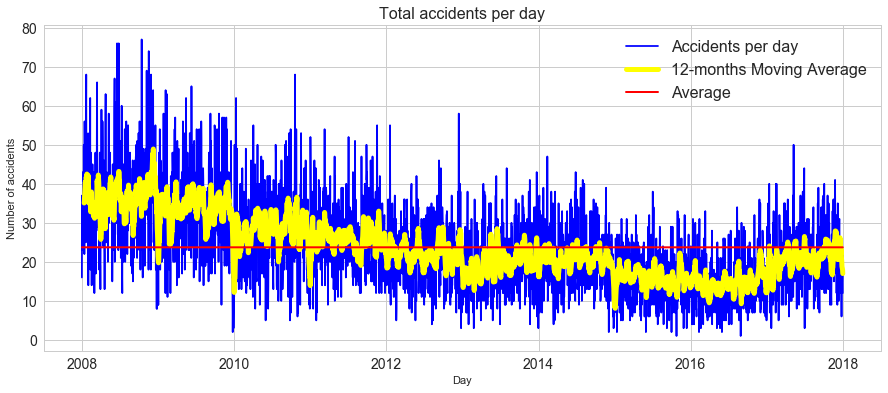

In [81]:
#resampling the data into days and plotting total daily accidents. The yellow line is sthe moving average and the red line is average.
merged = merged[(merged['Year_x'] > 2007)]
accidents_daily = pd.DataFrame(merged.resample('D').size())
accidents_daily['MEAN'] = merged.resample('D').size().mean()
plt.figure(figsize=(15,6))
merged.resample('D').size().plot(label='Accidents per day', color = 'b')
merged.resample('D').size().rolling(window=12).mean().plot(color='yellow', linewidth=5, label='12-months Moving Average')
accidents_daily['MEAN'].plot(color='r', linewidth=2, label='Average')
plt.title('Total accidents per day', fontsize=16)
plt.xlabel('Day')
plt.ylabel('Number of accidents')
plt.tick_params(labelsize=14)
plt.legend(prop={'size':16})

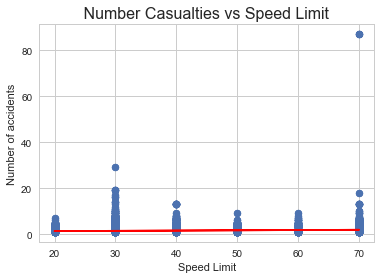

In [82]:
#plotting Number Casualties and Speed Limit to find if any associations. 
Y = merged['NumberCasualties']
speedLimit = merged['SpeedLimit']
speedLimit=speedLimit.values.reshape(len(speedLimit),1)
Y=Y.values.reshape(len(Y),1)
#X = acc_data.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
#Y = acc_data.iloc[:, 1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(speedLimit, Y)  # perform linear regression
Y_pred = linear_regressor.predict(speedLimit)  # make predictions
plt.scatter(speedLimit, Y)
plt.plot(speedLimit, Y_pred, color='red')
plt.title(' Number Casualties vs Speed Limit ', fontsize=16)
plt.xlabel('Speed Limit')
plt.ylabel('Number of accidents')
plt.show()

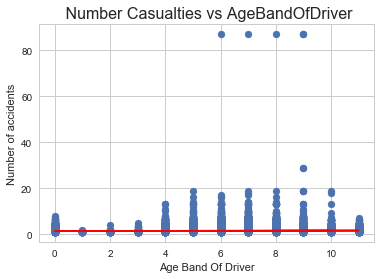

In [83]:

#plotting Number Casualties and Age Band Of Driver to find if any associations. 
AgeBandOfDriver = merged['AgeBandOfDriver']
AgeBandOfDriver=AgeBandOfDriver.values.reshape(len(AgeBandOfDriver),1)
linear_regressor.fit(AgeBandOfDriver, Y)  # perform linear regression
Y_pred = linear_regressor.predict(AgeBandOfDriver)  # make predictions
plt.scatter(AgeBandOfDriver, Y)
plt.plot(AgeBandOfDriver, Y_pred, color='red')
plt.title(' Number Casualties vs AgeBandOfDriver', fontsize=16)
plt.xlabel('Age Band Of Driver')
plt.ylabel('Number of accidents')
plt.show()

In [84]:
groupByDate = merged.groupby('OutputDate')['NumberCasualties'].count()
groupByDate.head()

OutputDate
01/01/2008    16
01/01/2009    24
01/01/2010    11
01/01/2011     9
01/01/2012    18
Name: NumberCasualties, dtype: int64

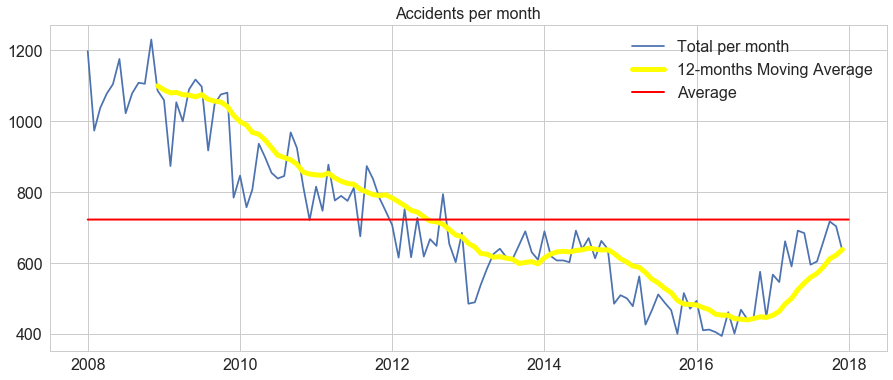

In [85]:
#resampling the data into days and plotting total monthly accidents. The yellow line is sthe moving average and the red line is average.
plt.figure(figsize=(15,6))
merged.resample('M').size().plot(label='Total per month')
merged.resample('M').size().rolling(window=12).mean().plot(color='yellow', linewidth=5, label='12-months Moving Average')
accidents_daily['MEAN'] = merged.resample('M').size().mean() 
accidents_daily['MEAN'].plot(color='r', linewidth=2, label='Average')
plt.title('Accidents per month', fontsize=16)
plt.xlabel('')
plt.legend(prop={'size':16})
plt.tick_params(labelsize=16)

In [86]:
merged = merged[(merged['Year_x'] > 2016)]

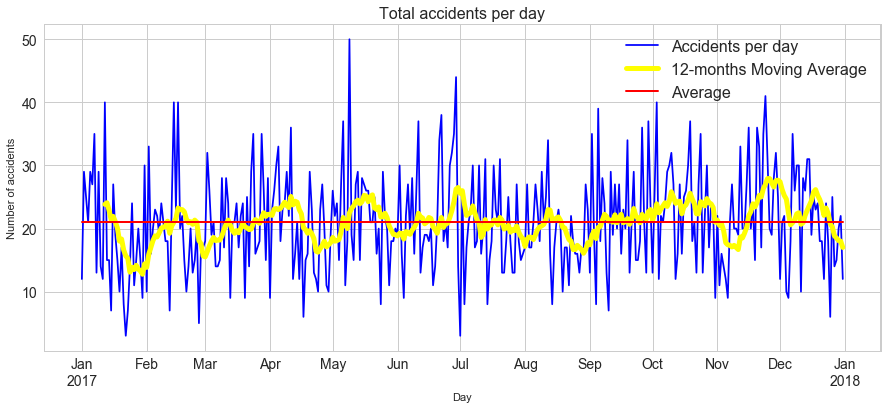

In [88]:
#resampling the data into days and plotting total daily accidents in 2017. The yellow line is sthe moving average and the red line is average.
merged = merged[(merged['Year_x'] > 2007)]
accidents_daily = pd.DataFrame(merged.resample('D').size())
accidents_daily['MEAN'] = merged.resample('D').size().mean()
plt.figure(figsize=(15,6))
merged.resample('D').size().plot(label='Accidents per day', color = 'b')
merged.resample('D').size().rolling(window=12).mean().plot(color='yellow', linewidth=5, label='12-months Moving Average')
accidents_daily['MEAN'].plot(color='r', linewidth=2, label='Average')
plt.title('Total accidents per day', fontsize=16)
plt.xlabel('Day')
plt.ylabel('Number of accidents')
plt.tick_params(labelsize=14)
plt.legend(prop={'size':16})

In [38]:
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
months = [ 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

Text(0,0.5,'Total Number of Accidents')

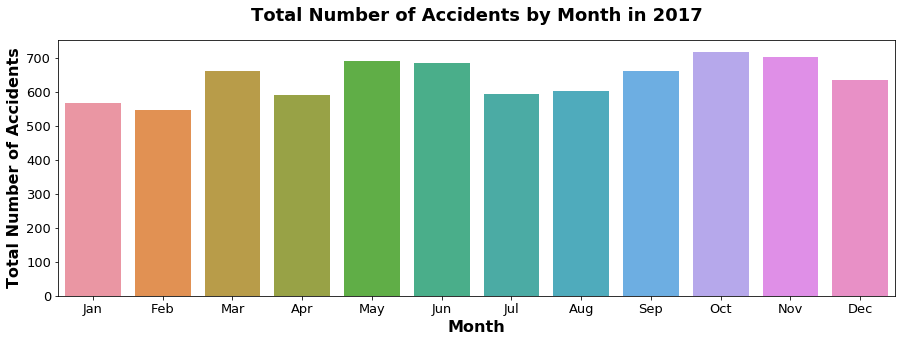

In [39]:
#plotting Total Number of Accidents by Month in 2017 
merged['OutputDate'] = pd.to_datetime(merged['OutputDate'])
fig = plt.figure(figsize = (15,16))
merged['day'] = merged['OutputDate'].dt.day
merged['month'] = merged['OutputDate'].dt.month
merged['hour'] = merged['OutputDate'].dt.hour
plt.subplot(3,1,3)
axes3 = sns.countplot(merged.month)
axes3.set_xticklabels(months)

plt.tick_params(labelsize=13)
gap = axes3.title
gap.set_position([.5, 1.05])
plt.title('Total Number of Accidents by Month in 2017', fontsize=18, fontweight='bold')
plt.xlabel('Month', fontsize=16, fontweight='bold')
plt.ylabel('Total Number of Accidents', fontsize=16, fontweight='bold')

In [41]:
merged['hour'] = merged['OutputDate'].dt.hour
merged['day'] = merged['OutputDate'].dt.day
merged['month'] = merged['OutputDate'].dt.month
merged['year'] = merged['OutputDate'].dt.year
merged['quarter'] = merged['OutputDate'].dt.quarter
merged['day_of_week'] = merged['OutputDate'].dt.dayofweek
merged['weekday'] = merged['OutputDate'].dt.weekday

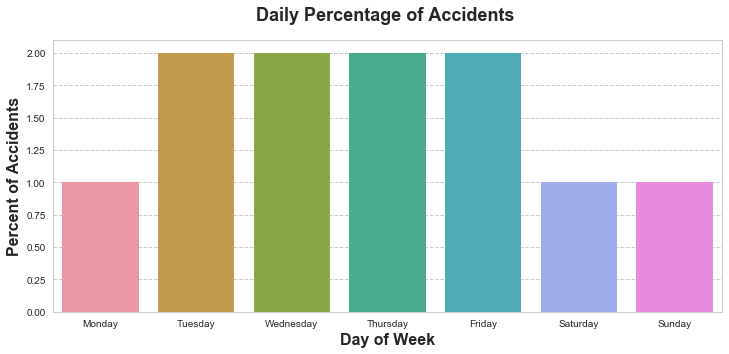

In [42]:
#plotting TDaily Percentage of Accidents in 2017 
daily_rides= merged[['OutputDate','day_of_week']].groupby(['day_of_week']).size().reset_index(name='NumberCasualties')
daily_rides['Percent of Rides']=round(daily_rides['NumberCasualties']/acc_data.shape[0]*100)
weeksDay={0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
daily_rides['Day of Week'] = daily_rides['day_of_week'].map(weeksDay)
sns.set(style='ticks',color_codes=False)
sns.set_style('whitegrid')
fig, axes = plt.subplots(figsize=(12,5))
axes = sns.barplot(x="Day of Week",y="Percent of Rides",data=daily_rides)
plt.grid( which='major', axis='y', linestyle='--')
gap = axes.title
gap.set_position([.5, 1.05])
plt.title('Daily Percentage of Accidents ', fontsize=18, fontweight='bold')
plt.xlabel('Day of Week', fontsize=16, fontweight='bold')
plt.ylabel('Percent of Accidents', fontsize=16, fontweight='bold')
axes.yaxis.grid(True);

Text(0,0.5,'Total Accidents')

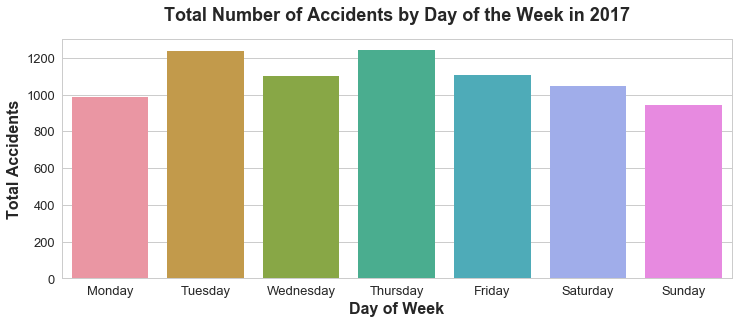

In [43]:
#plotting Total Number of Accidents by Day of the Week in 2017
fig = plt.figure(figsize = (12,15))
merged['weekday'] = merged['OutputDate'].dt.weekday
plt.subplot(3,1,2)
axes2 = sns.countplot(merged.weekday, order = range(7))
axes2.set_xticklabels(weekdays)
 
plt.tick_params(labelsize=13)
gap = axes2.title
gap.set_position([.5, 1.05])
plt.title('Total Number of Accidents by Day of the Week in 2017', fontsize=18, fontweight='bold')
plt.xlabel('Day of Week', fontsize=16, fontweight='bold')
plt.ylabel('Total Accidents', fontsize=16, fontweight='bold')


# Preparing inputs for predictive model.


In [37]:
feature_train = merged.drop(['OutputDate','Year_y'], axis = 1)
feature_train.head()

,Accident Index,Year_x,Severity,NumberVehicles,NumberCasualties,Day,OutputTime,Easting,Northing,LocalAuthority,...,JunctionLocation,Skidding,HitObjectOnCWay,VehicleLeaveCWay,HitObjectOffCWay,FirstPointImpact,JourneyPurpose,ForeignReg,SexOfDriver,AgeBandOfDriver
67871,104960282015,2015,3,1,2,5,01:55,393642,405323,104,...,0,0,0,1,2,1,5,0,1,5
67872,104961952015,2015,2,2,3,5,03:01,391498,404651,104,...,4,0,0,1,0,1,1,0,1,8
67873,104961952015,2015,2,2,3,5,03:01,391498,404651,104,...,4,0,0,1,0,4,5,0,1,4
67874,107953512015,2015,3,2,2,5,04:44,373645,403094,107,...,1,0,0,0,7,4,1,0,1,7
67875,107953512015,2015,3,2,2,5,04:44,373645,403094,107,...,1,0,0,0,0,1,1,0,1,6


In [38]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18800 entries, 67871 to 86670
Data columns (total 43 columns):
Accident Index                   18800 non-null int64
Year_x                           18800 non-null int64
Severity                         18800 non-null int64
NumberVehicles                   18800 non-null int64
NumberCasualties                 18800 non-null int64
OutputDate                       18800 non-null object
Day                              18800 non-null int64
OutputTime                       18800 non-null object
Easting                          18800 non-null int64
Northing                         18800 non-null int64
LocalAuthority                   18800 non-null int64
Road1Class                       18800 non-null int64
Road1Number                      18800 non-null int64
CarriagewayType                  18800 non-null int64
SpeedLimit                       18800 non-null int64
JunctionDetail                   18800 non-null int64
JunctionControl      

In [39]:
#encoding the data using a scikit learn algorithm  - oneHotEncoder
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
encode_oneHot = preprocessing.OneHotEncoder()
encoded = encode_oneHot.fit_transform(feature_train[['Severity', 'SpeedLimit', 'Day','Road1Number','CarriagewayType', 'JunctionControl','SexOfDriver', 'AgeBandOfDriver']]).toarray()
scaled = preprocessing.scale(feature_train[['WeatherCondition' ]].values) 
feature_trans = np.concatenate([encoded, scaled], axis =1)
feat= ['Severity', 'SpeedLimit', 'Day','Road1Number','CarriagewayType', 'JunctionControl','SexOfDriver', 'AgeBandOfDriver']
print ("encoded categorical data",'\n', encoded, np.shape(encoded), '\n') 
print ("scaled numeric data", '\n', scaled, np.shape(scaled), '\n')
print ("transformed data", '\n', feature_trans, np.shape(feature_trans), '\n')
print ("selected features: ", '\n', feat)

encoded categorical data 
 [[ 0.  0.  1. ...,  0.  0.  0.]
 [ 0.  1.  0. ...,  0.  0.  0.]
 [ 0.  1.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  1. ...,  1.  0.  0.]
 [ 0.  0.  1. ...,  0.  0.  0.]
 [ 0.  0.  1. ...,  0.  1.  0.]] (18800, 235) 

scaled numeric data 
 [[-0.36863405]
 [-0.36863405]
 [-0.36863405]
 ..., 
 [ 0.18012833]
 [ 0.18012833]
 [ 0.18012833]] (18800, 1) 

transformed data 
 [[ 0.          0.          1.         ...,  0.          0.         -0.36863405]
 [ 0.          1.          0.         ...,  0.          0.         -0.36863405]
 [ 0.          1.          0.         ...,  0.          0.         -0.36863405]
 ..., 
 [ 0.          0.          1.         ...,  0.          0.          0.18012833]
 [ 0.          0.          1.         ...,  0.          0.          0.18012833]
 [ 0.          0.          1.         ...,  1.          0.          0.18012833]] (18800, 236) 

selected features:  
 ['Severity', 'SpeedLimit', 'Day', 'Road1Number', 'CarriagewayType', 'JunctionCont

In [40]:
target = merged['NumberCasualties']
training_data, testing_data, training_target, testing_target = train_test_split (feature_trans, target, test_size = 0.1, random_state = 2000)
print ("train_data", training_data.shape,'\n', training_data, '\n')
print ('test_data', testing_data.shape, '\n', testing_data)

train_data (16920, 236) 
 [[ 0.          0.          1.         ...,  0.          0.         -0.36863405]
 [ 0.          0.          1.         ...,  0.          0.         -0.36863405]
 [ 0.          1.          0.         ...,  0.          0.         -0.36863405]
 ..., 
 [ 0.          0.          1.         ...,  0.          0.         -0.36863405]
 [ 0.          0.          1.         ...,  0.          0.         -0.36863405]
 [ 0.          0.          1.         ...,  0.          0.         -0.36863405]] 

test_data (1880, 236) 
 [[ 0.          0.          1.         ...,  0.          0.         -0.36863405]
 [ 0.          0.          1.         ...,  0.          0.         -0.36863405]
 [ 0.          0.          1.         ...,  0.          0.         -0.36863405]
 ..., 
 [ 0.          0.          1.         ...,  0.          0.         -0.36863405]
 [ 0.          0.          1.         ...,  0.          0.         -0.36863405]
 [ 0.          0.          1.         ...,  0.       

In [41]:
#RandomForestRegressor model
RandomForestRegressor_model = RandomForestRegressor(random_state = 0, max_depth = 20, n_estimators = 200)
RandomForestRegressor_model.fit(training_data, training_target)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [42]:
#checking accuracy 
mean_squared_error(testing_target, RandomForestRegressor_model.predict(testing_data))

0.74568494525000573

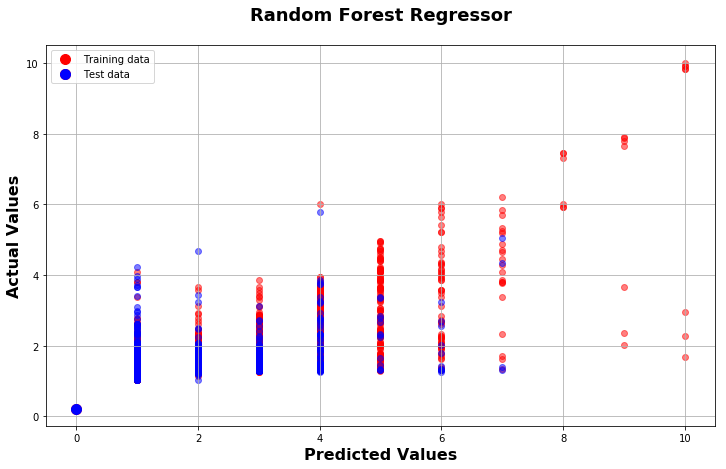

In [43]:
fig, axes = plt.subplots(figsize = (12, 7))
axes.grid(True)
axes.scatter(training_target, RandomForestRegressor_model.predict(training_data), alpha = 0.5, color = 'red')
axes.scatter(testing_target, RandomForestRegressor_model.predict(testing_data), alpha = 0.5, color = 'blue')
plt.title('Random Forest Regressor',fontsize=18, fontweight='bold')
circle = randn(1)
red_dot, = plt.plot(circle, "ro", markersize=10)
blue_dot, = plt.plot(circle, "bo", markersize=10) 
gap = axes.title
gap.set_position([.5, 1.05])
plt.xlabel('Predicted Values', fontsize=16, fontweight='bold')
plt.ylabel('Actual Values', fontsize=16, fontweight='bold')
plt.legend([red_dot, (red_dot, blue_dot)], ["Training data", "Test data"])

In [44]:
#SVR model
SVR_model = SVR(C = 1e3, epsilon = 0.25, kernel = 'rbf', gamma = 0.1)
SVR_model.fit(training_data,training_target) 
mean_squared_error(testing_target, SVR_model.predict(testing_data))

0.90258143408744107

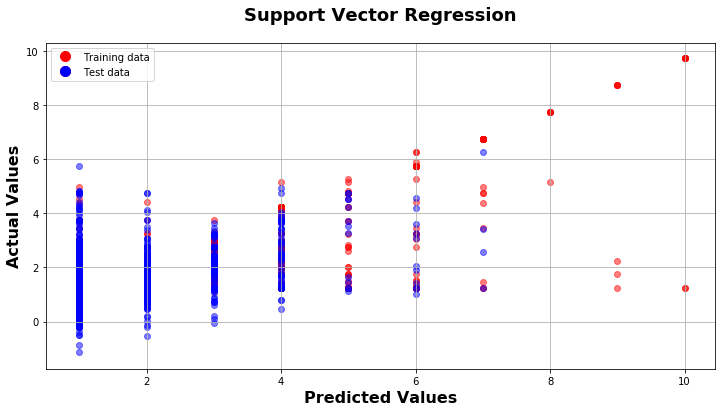

In [45]:
fig, axes = plt.subplots(figsize = (12, 6))
axes.grid(True)
axes.scatter(training_target, SVR_model.predict(training_data), alpha = 0.5, color = 'red')
axes.scatter(testing_target, SVR_model.predict(testing_data), alpha = 0.5, color = 'blue')
plt.title('Support Vector Regression', fontsize=18, fontweight='bold')
gap = axes.title
gap.set_position([.5, 1.05])
plt.xlabel('Predicted Values', fontsize=16, fontweight='bold')
plt.ylabel('Actual Values', fontsize=16, fontweight='bold')
plt.legend([red_dot, (red_dot, blue_dot)], ["Training data", "Test data"])

In [46]:
#KNeighborsRegressor model
kNeighborsRegressor_model = KNeighborsRegressor()
kNeighborsRegressor_model.fit(training_data,training_target)
mean_squared_error(testing_target, kNeighborsRegressor_model.predict(testing_data))

0.86176595744680862

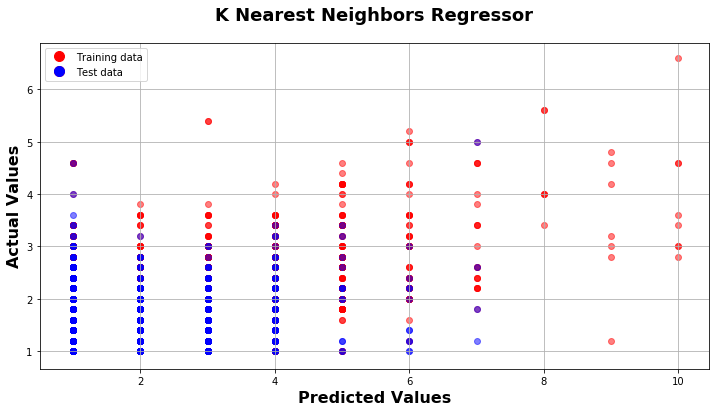

In [47]:
fig, axes = plt.subplots(figsize = (12, 6))
axes.grid(True)
axes.scatter(training_target, kNeighborsRegressor_model.predict(training_data), alpha = 0.5, color = 'red')
axes.scatter(testing_target, kNeighborsRegressor_model.predict(testing_data), alpha = 0.5, color = 'blue')
plt.title('K Nearest Neighbors Regressor', fontsize=18, fontweight='bold')
gap = axes.title
gap.set_position([.5, 1.05])
plt.xlabel('Predicted Values', fontsize=16, fontweight='bold')
plt.ylabel('Actual Values', fontsize=16, fontweight='bold')
plt.legend([red_dot, (red_dot, blue_dot)], ["Training data", "Test data"]) 

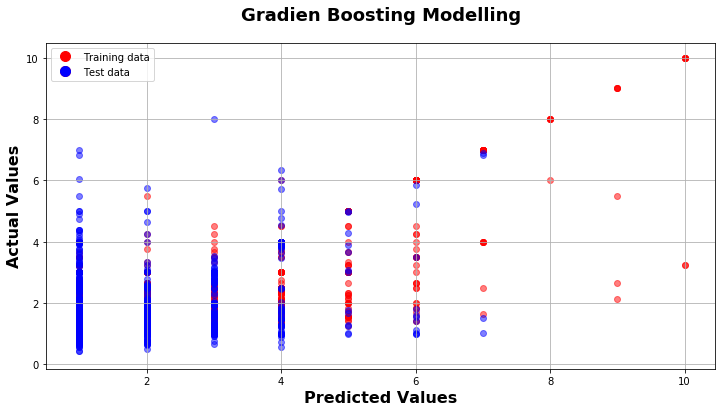

In [48]:
#GradientBoostingRegressor model
gradientBoostingRegressor_model = GradientBoostingRegressor(n_estimators = 500, learning_rate = 0.8, max_depth = 30)
gradientBoostingRegressor_model.fit(training_data, training_target)
mean_squared_error(testing_target, gradientBoostingRegressor_model.predict(testing_data))

fig, axes = plt.subplots(figsize = (12, 6))
axes.grid(True)
axes.scatter(training_target, gradientBoostingRegressor_model.predict(training_data), alpha = 0.5, color = 'red')
axes.scatter(testing_target, gradientBoostingRegressor_model.predict(testing_data), alpha = 0.5, color = 'blue')
plt.title('Gradien Boosting Modelling', fontsize=18, fontweight='bold')
gap = axes.title
gap.set_position([.5, 1.05])
plt.xlabel('Predicted Values', fontsize=16, fontweight='bold')
plt.ylabel('Actual Values', fontsize=16, fontweight='bold')
plt.legend([red_dot, (red_dot, blue_dot)], ["Training data", "Test data"])